<a href="https://colab.research.google.com/github/sammed97/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/M4/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.shape

(7787, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


Filling missing values with unknown

In [ ]:
df_1 = df.copy()

In [ ]:
df_1.fillna("Unknown",inplace=True)

In [ ]:
df_1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

we have filled missing values with **unknown.**

In [ ]:
df_1.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df_1['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [ ]:
df_1['country'].value_counts().head(50)

United States                    2555
India                             923
Unknown                           507
United Kingdom                    397
Japan                             226
South Korea                       183
Canada                            177
Spain                             134
France                            115
Egypt                             101
Mexico                            100
Turkey                            100
Australia                          83
Taiwan                             78
Brazil                             72
Philippines                        71
Nigeria                            70
Indonesia                          70
United Kingdom, United States      64
Germany                            61
United States, Canada              60
Thailand                           57
China                              57
Hong Kong                          52
Argentina                          50
Canada, United States              42
Italy       

In [ ]:
df_1['release_year'].value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

converting date_added column datatype to datetime

In [ ]:
df_1 = df_1.loc[df_1['date_added']!= 'Unknown']

In [ ]:
df_1.shape

(7777, 12)

In [ ]:
df_1['date_added'] = pd.to_datetime(df_1['date_added'])

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.9+ KB


In [ ]:
df_1['added_year'] = df_1['date_added'].dt.year


In [ ]:
df_1['added_month'] = df_1['date_added'].dt.month


In [ ]:
df_1['added_day'] = df_1['date_added'].dt.day


we will drop column 'date_added' as we create seperate columns for it according to year and month

In [ ]:
df_1.drop(columns="date_added",axis=1,inplace=True)

In [ ]:
df_1.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_year,added_month,added_day
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1


In [ ]:
df_1.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [ ]:
df_1.rating.value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
Unknown        7
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

Netflix's focus in recent years

Text(0.5, 1.0, "Recent year Netflix's Uploads")

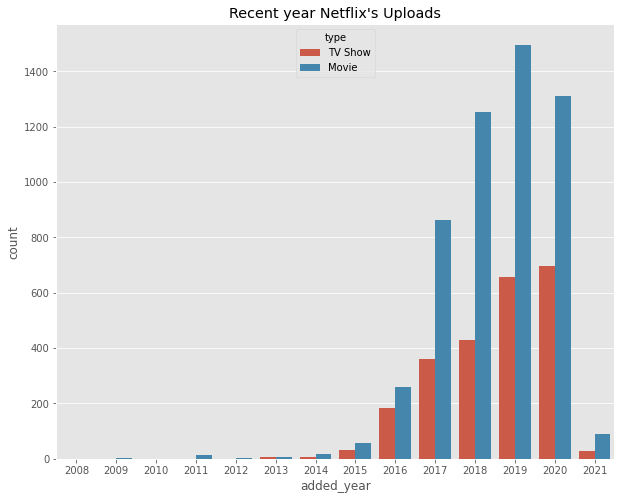

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='added_year',hue='type',data=df_1)
plt.title("Recent year Netflix's Uploads")

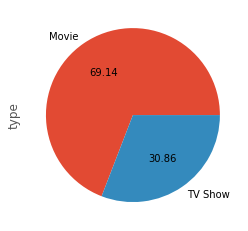

In [ ]:
# Pie chart for type of shows
df_1['type'].value_counts().plot(kind='pie',autopct="%.2f")

Exploring Countries

In [ ]:
country_count = df_1.copy()
country_count = pd.concat([country_count , df_1['country'].str.split(",",expand=True)],axis=1)
country_count

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,0,1,2,3,4,5,6,7,8,9,10,11
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,Brazil,None,None,None,None,None,None,None,None,None,None,None
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,Mexico,None,None,None,None,None,None,None,None,None,None,None
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,Singapore,None,None,None,None,None,None,None,None,None,None,None
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,United States,None,None,None,None,None,None,None,None,None,None,None
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,United States,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10,19,Sweden,Czech Republic,United Kingdom,Denmark,Netherlands,None,None,None,None,None,None,None
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,2,India,None,None,None,None,None,None,None,None,None,None,None
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,25,Unknown,None,None,None,None,None,None,None,None,None,None,None
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,31,Australia,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
country_count = country_count.melt(id_vars = ["type", "title"], value_vars = range(12), value_name = "country")
country_count = country_count[country_count["country"].notna()]
country_count

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  """Entry point for launching an IPython kernel.


,type,title,variable,country
0,TV Show,3%,0,Brazil
1,Movie,7:19,0,Mexico
2,Movie,23:59,0,Singapore
3,Movie,9,0,United States
4,Movie,21,0,United States
...,...,...,...,...
68821,Movie,The Look of Silence,8,Germany
70723,Movie,Barbecue,9,Sweden
76598,Movie,The Look of Silence,9,Netherlands
78500,Movie,Barbecue,10,United States


In [ ]:
country_count['country'].nunique()

189

In [ ]:
country_count['country'].value_counts()[:10]

United States     2877
India              956
United Kingdom     576
Unknown            506
 United States     414
Canada             259
Japan              236
France             196
South Korea        194
Spain              168
Name: country, dtype: int64

united states has two different entries

In [ ]:
country_count["country"] = country_count["country"].str.strip()
country_count["country"].value_counts()[:10]

United States     3291
India              990
United Kingdom     722
Unknown            506
Canada             412
France             349
Japan              286
Spain              215
South Korea        212
Germany            199
Name: country, dtype: int64

we will work on 'listed_in'

In [ ]:
# first we rename the column for sake of simplicity
df_1.rename(columns={'listed_in':'genres'},inplace=True)

In [ ]:
genres_explore = df_1.copy()

In [ ]:
genres_explore = pd.concat([genres_explore, df_1["genres"].str.split(",", expand = True)], axis = 1)

In [ ]:
genres_explore

,show_id,type,title,director,cast,country,release_year,rating,duration,genres,description,added_year,added_month,added_day,0,1,2
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,Dramas,International Movies,None
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,Horror Movies,International Movies,None
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,Action & Adventure,Independent Movies,Sci-Fi & Fantasy
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,Dramas,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10,19,Dramas,International Movies,None
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,2,Dramas,International Movies,Music & Musicals
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,25,Documentaries,International Movies,Music & Musicals
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,31,International TV Shows,Reality TV,None


In [ ]:
genres_explore = genres_explore.melt(id_vars = ['type','title'], value_vars=range(3),value_name="genres")
genres_explore = genres_explore[genres_explore['genres'].notna()]
genres_explore

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  """Entry point for launching an IPython kernel.


,type,title,variable,genres
0,TV Show,3%,0,International TV Shows
1,Movie,7:19,0,Dramas
2,Movie,23:59,0,Horror Movies
3,Movie,9,0,Action & Adventure
4,Movie,21,0,Dramas
...,...,...,...,...
23321,TV Show,Zombie Dumb,2,TV Comedies
23323,TV Show,Zona Rosa,2,Stand-Up Comedy & Talk Shows
23324,Movie,Zoo,2,International Movies
23327,Movie,Zubaan,2,Music & Musicals


In [ ]:
genres_explore['genres'].value_counts()[:30]

 International Movies         2323
Dramas                        1384
Comedies                      1074
Documentaries                  751
 Dramas                        722
Action & Adventure             721
International TV Shows         689
 Independent Movies            653
 TV Dramas                     641
 Romantic Movies               528
 International TV Shows        509
Children & Family Movies       502
 Thrillers                     442
 TV Comedies                   409
 Comedies                      397
Crime TV Shows                 369
Kids' TV                       357
Stand-Up Comedy                321
 Romantic TV Shows             305
 Music & Musicals              304
Horror Movies                  244
British TV Shows               231
 Sci-Fi & Fantasy              207
 Sports Movies                 195
Docuseries                     193
 Docuseries                    159
 Korean TV Shows               150
Anime Series                   147
 Spanish-Language TV

In [ ]:
genres_explore['genres']=genres_explore['genres'].str.strip()
genres_explore['genres'].value_counts()[:20]

International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1198
Documentaries                786
Action & Adventure           721
TV Dramas                    703
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
TV Comedies                  518
Thrillers                    491
Crime TV Shows               426
Kids' TV                     412
Docuseries                   352
Romantic TV Shows            333
Stand-Up Comedy              329
Music & Musicals             321
Horror Movies                312
British TV Shows             231
Name: genres, dtype: int64

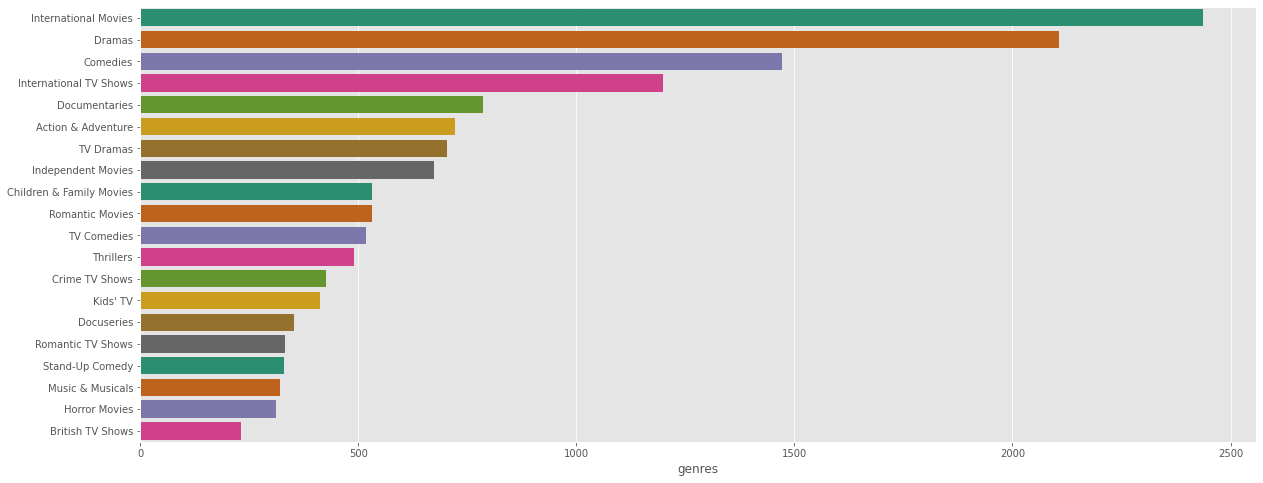

In [ ]:
plt.figure(figsize = (20, 8))
listed_in = genres_explore["genres"].value_counts()[:20]
sns.barplot(x = listed_in, y = listed_in.index, palette = "Dark2")

In [ ]:
df_genre = pd.DataFrame(genres_explore.genres.value_counts()).reset_index().rename(columns={'index':'genre', 'genres':'count'})

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [ ]:
fig_tree = px.treemap(df_genre, path=[px.Constant("Distribution of Geners"), 'count','genre'])
fig_tree.update_layout(title='Highest watched Geners on Netflix',
                  margin=dict(t=50, b=0, l=70, r=40),
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#fff', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

In [ ]:
df_1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'genres', 'description',
       'added_year', 'added_month', 'added_day'],
      dtype='object')

In [ ]:
df_1.added_month.value_counts()

12    833
10    785
1     757
11    738
3     669
9     619
8     618
4     601
7     600
5     543
6     542
2     472
Name: added_month, dtype: int64

Text(0.5, 1.0, 'Monthwise content addition')

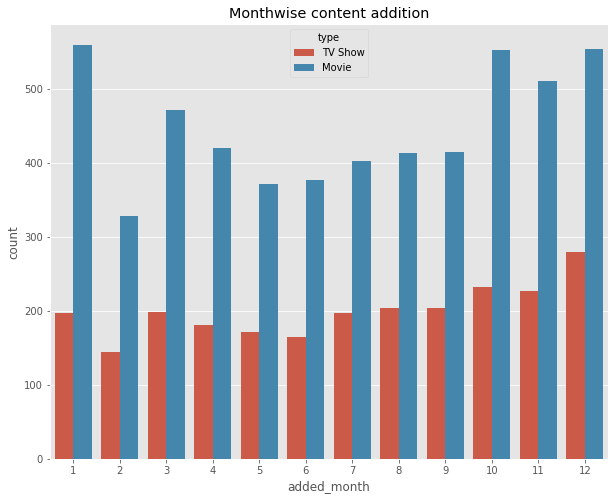

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='added_month',hue='type',data=df_1)
plt.title("Monthwise content addition")

we can clearly see that on **"January"**, **"October"** and in **"December"** there is more content added on netflix.

And in **"February"** very less amount of content added.

**Plotting Bar chart for checking how many movies/shows added on an avergae on days of evrey month**

Text(0.5, 1.0, 'Daywise content addition')

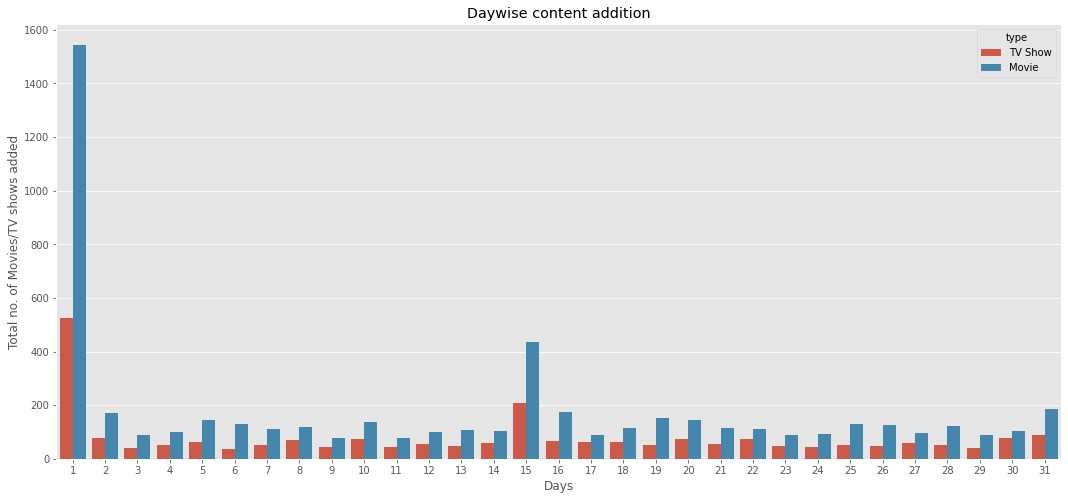

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x='added_day',hue='type',data=df_1)
plt.xlabel('Days')
plt.ylabel('Total no. of Movies/TV shows added')
plt.title("Daywise content addition")

we can clearly spot the insights that netflix majorly add the content on the **1st day of every month**.

And there is another day which is **15th**, mid of the month which has second highest number of contents added on it.

In [ ]:
df_1.rating.value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
Unknown        7
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

Text(0.5, 1.0, 'Movies/TV shows - Rating wise')

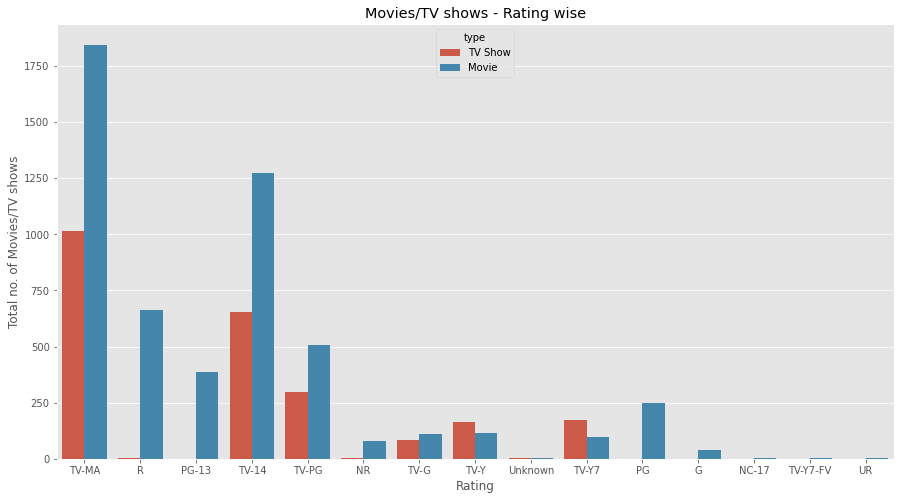

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='rating',hue='type',data=df_1)
plt.xlabel('Rating')
plt.ylabel('Total no. of Movies/TV shows')
plt.title("Movies/TV shows - Rating wise")

## **Netflix Rating of Movies/TV Shows based on content:-**

**TV-MA** :for Mature Audiences

**R** : Restricted

**PG-13** : Parents strongly cautioned. May be Inappropriate for ages 12 and under

**TV-14** : Parents strongly cautioned. May not be suitable for ages 14 and under

**TV-PG** : Parental Guidance suggested

**NR** : Not Rated

**TV-G** : Suitable for General Audiences

**TV-Y** : Designed to be appropriate for all children

**PG** : Parental Guidance suggested

**G** : Suitable for General Audiences

**NC-17** : the content isn't suitable for children under 17 and younger

**TV-Y7-FV** : Suitable for ages 7 and up

**UR** : Unrated






In [74]:
df_1['duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1